# Testing the action potential of cell models by using standard parameters


In [1]:
# fileName

fileName = 'eg_testing-cell-models'

In [2]:
# libs

import pyNN.spiNNaker as sim
from pyNN import space 
import numpy as np
import matplotlib.pyplot as plt


Detected PyNN version 0.9.4 and Neo version 0.6.1


In [3]:
# simulation settings

sim.setup(
        timestep=1, # [ms]
        min_delay=1, # [ms]
        max_delay=100) # [ms]

simtime = 250 # [ms+]



2022-12-05 11:02:37 INFO: Read cfg files: /home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/spinnaker/.spynnaker.cfg
2022-12-05 11:02:37 INFO: Will search these locations for binaries: /home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spinn_front_end_common/common_model_binaries : /home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spynnaker/pyNN/model_binaries
2022-12-05 11:02:37 WARNING: /home/spinnaker/CNT-2022/SpiNNaker/reports has 26 old reports that have not been closed


['/home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/spinnaker/.spynnaker.cfg']


2022-12-05 11:02:37 WARNING: /home/spinnaker/CNT-2022/SpiNNaker/application_generated_data_files has 27 old reports that have not been closed
2022-12-05 11:02:37 INFO: Setting time scale factor to 1.
2022-12-05 11:02:37 INFO: Setting machine time step to 1000 micro-seconds.


## make the network

In [4]:
# define make_pop

pops = {}

def make_pop(cell_model):
    pops = sim.Population(
                            1, # one cell in each cell model
                            cell_model,
                            cellparams=None, # std pars used
                            structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0),
                            initial_values=None,
                            label=str(cell_model),
                            constraints=None,
                            additional_parameters=None,
                            )
    pops.record('v')
    
    return pops




In [5]:
# compute pops

for idx, value in enumerate([
                            sim.IF_cond_exp, 
                            sim.IF_curr_alpha,
                            sim.IF_curr_exp,
                            sim.Izhikevich,
                            sim.extra_models.IF_curr_dual_exp,
                            sim.extra_models.IFCondExpStoc,
                            sim.extra_models.IFCurDelta,
                            sim.extra_models.IFCurrExpCa2Adaptive,
                            sim.extra_models.Izhikevich_cond]):

    pops['model_' + str(idx)] = make_pop(value) 

In [6]:
# check pops

pops.keys()

dict_keys(['model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8'])

## make the thalamic input stimulus

In [7]:
# a sequence of ten spikes with regularly spaced spike times

pops['thalamus'] = sim.Population(
                            1, # one thalamic cell for each cell model
                            sim.SpikeSourceArray(np.arange(50,60)), # ten sequential spike times
                            structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0),
                            )    

pops.keys()

dict_keys(['model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'thalamus'])

## make the projections

In [8]:
projs = {}

for i in range(9):
    projs['thalamus', 'model_' + str(i)] = sim.Projection(
                                    pops['thalamus'],
                                    pops['model_' + str(i)],
                                    sim.OneToOneConnector(),
                                    synapse_type=sim.StaticSynapse(weight=0.1, delay=1.0),
                                    receptor_type = 'excitatory',
                                    space = space.Space(axes = 'x'),
                                    label=None,
                                )

projs.keys()

dict_keys([('thalamus', 'model_0'), ('thalamus', 'model_1'), ('thalamus', 'model_2'), ('thalamus', 'model_3'), ('thalamus', 'model_4'), ('thalamus', 'model_5'), ('thalamus', 'model_6'), ('thalamus', 'model_7'), ('thalamus', 'model_8')])

## run the simulation

In [9]:
sim.run(simtime) 

2022-12-05 11:02:42 INFO: Simulating for 250 1.0ms timesteps using a hardware timestep of 1000us
2022-12-05 11:02:42 INFO: Starting execution process
2022-12-05 11:02:45 INFO: Time 0:00:03.099365 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2022-12-05 11:02:54 INFO: Time 0:00:08.663791 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2022-12-05 11:02:59 INFO: Time 0:00:04.899362 taken by PartitionAndPlacePartitioner
Created spalloc job 6910890
2022-12-05 11:02:59 INFO: Created spalloc job 6910890
Waiting for board power commands to complete.
2022-12-05 11:02:59 INFO: Waiting for board power commands to complete.
2022-12-05 11:03:09 INFO: Time 0:00:09.764287 taken by SpallocAllocator
2022-12-05 1

250.0

## save results

In [14]:
# save the results

outputs = {}

for i in range(9):
    outputs['model_' + str(i)] = pops['model_' + str(i)].get_data()
    for recording in ['v', 'gsyn_inh', 'gsyn_exc', 'spikes']:
        pops['model_' + str(i)].write_data(fileName + '_' + str(recording) + '.pkl')


Getting v for <class 'spynnaker.pyNN.models.neuron.builds.if_cond_exp_base.IFCondExpBase'>
|0%                          50%                         100%|
Getting v for <class 'spynnaker.pyNN.models.neuron.builds.if_cond_exp_base.IFCondExpBase'>
|0%                          50%                         100%|
Getting v for <class 'spynnaker.pyNN.models.neuron.builds.if_cond_exp_base.IFCondExpBase'>
|0%                          50%                         100%|
Getting v for <class 'spynnaker.pyNN.models.neuron.builds.if_cond_exp_base.IFCondExpBase'>
|0%                          50%                         100%|
Getting v for <class 'spynnaker.pyNN.models.neuron.builds.if_cond_exp_base.IFCondExpBase'>
|0%                          50%                         100%|
Getting v for <class 'spynnaker.pyNN.models.neuron.builds.if_curr_alpha.IFCurrAlpha'>
|0%                          50%                         100%|
2022-12-05 11:08:02 WARNING: Warning getting data on a whole population when sele

## recover results

In [15]:
# make the recover results function

def recover_results(outputs):
    results = {}
    for key in outputs.keys(): 
        
        # to get voltage and conductances
        for analogsignal in outputs[key].segments[0].analogsignals:
            print(analogsignal.name)
            results[key, analogsignal.name] = analogsignal

        # to get spikes
        results[key, 'spikes'] = outputs[key].segments[0].spiketrains
    return results


In [16]:
# recover results

results = recover_results(outputs)
results.keys()

v
v
v
v
v
v
v
v
v


dict_keys([('model_0', 'v'), ('model_0', 'spikes'), ('model_1', 'v'), ('model_1', 'spikes'), ('model_2', 'v'), ('model_2', 'spikes'), ('model_3', 'v'), ('model_3', 'spikes'), ('model_4', 'v'), ('model_4', 'spikes'), ('model_5', 'v'), ('model_5', 'spikes'), ('model_6', 'v'), ('model_6', 'spikes'), ('model_7', 'v'), ('model_7', 'spikes'), ('model_8', 'v'), ('model_8', 'spikes')])

## check the voltage signature

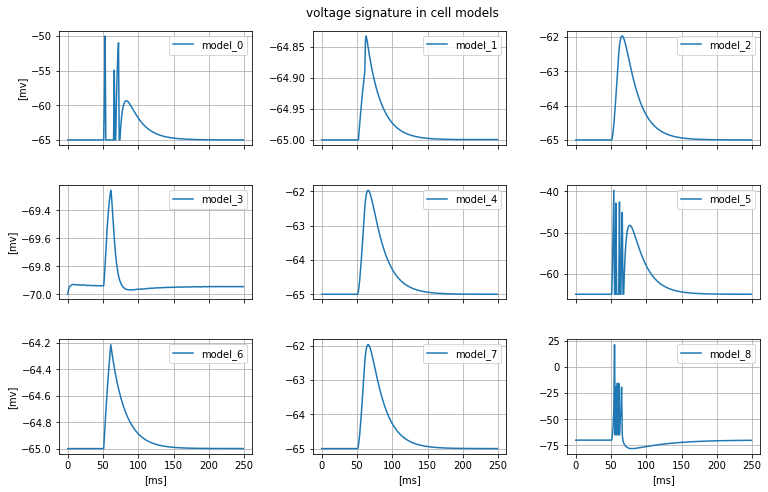

In [17]:
%matplotlib inline

fig, axes = plt.subplots(3, 3, sharex=True, sharey=False, figsize=(11,7))
fig.tight_layout(pad=3)
fig.suptitle('voltage signature in cell models')

axes_list = fig.axes
idx = 0
for i in range(9):
    im = axes_list[i].plot(results['model_' + str(i), 'v'], label=str('model_' + str(i)))
    #axes_list[i].set_xticklabels([])
    axes_list[i].legend()
    axes_list[i].grid(which='both')
    if i==0 or i==3 or i==6:
        axes_list[i].set_ylabel('[mv]')
    if i==6 or i==7 or i==8:
        axes_list[i].set_xlabel('[ms]')


In [14]:
# end simulation

sim.end()

## Task 1: on the action potential of cell models

- Have a look of the plot, you should observe the different voltage signatures having similarities as well as differences. <br>
  Describe them or try making a classification by adopting criteria indicated in this bottom image<br>
  
  e.g., 
      - depolarization timing
      - shape of depolarization
      - action potential timing
      - shape of repolarization
      - presence/absence of refractory period
      - resting state timing
      
      
- This simulation has been done with standard parameters. <br>
  Choose a parameter shared from all the models and tune it. <br>
  Observe how the voltage trace of the action potential changes. <br>
  To explore the default paramters, use e.g., `sim.IF_cond_exp.default_parameters` <br>
  Change them by defining a new dictionary of pars for each model call e.g., pars[model_x]<br>
  

![](https://upload.wikimedia.org/wikipedia/commons/4/4a/Action_potential.svg)

## Task 2: on the network of different cell models

- The previous results are related to single behaviour of the given cell models.<br>
  Try to make a population of 25 cells for each model and record their voltage.<br>
  The input should be design as a sequence of ten input spikes separeted 150 ms for each model.<br>
  E.g., the first model receives input at 50-59ms, the second at 200-209ms, the third at 350-359ms etc.<br>
  Plot the results in a single plot showing the all traces that should appear sequentally displayed.<br>
  Set the simtime at 1500ms.